# SMARTPHONE PRICE PREDICTION PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
import requests
import time
from bs4 import BeautifulSoup as bts
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 100)

### DATA COLLECTION WITH WEB SCRAPING

In [2]:
def getAndParseURL(url):
    result = requests.get(url ,headers={"User-Agent":"Chrome/96.0.4664.92"})
    soup = bts(result.text, 'html.parser')
    return soup

In [3]:
PAGE_LINKS = []
def getPageLinks(url) :
    html = getAndParseURL(url)
    for i in html.findAll("link",{"rel":"canonical"}) :
        for b in range(1,51) :
            PAGE_LINKS.append(url + "?page={}".format(b))
    return PAGE_LINKS

In [4]:
PRODUCT_LINKS = []
def getProductLinks(url) :
    
    for  pageLink in getPageLinks(url) :
        html = getAndParseURL(pageLink)
        for i in html.findAll("div",{"class":"s1cegxbo-1 cACjAF"}) :
            for b in i.findAll("div",{"class":"z7ntrt-0 cfoZhx s1a29zcm-11 ggOMjb"}) :
                for c in b.findAll("a",{"class":"link-detail"}) :
                    PRODUCT_LINKS.append("https://www.cimri.com" + c["href"])

    return PRODUCT_LINKS      

In [5]:
def getDataFrame(url) :
    Record = []
    
    for productLink in getProductLinks(url) :
        
        html = getAndParseURL(productLink)
        
        if html.select_one('span:-soup-contains("Ekran Boyutu") + span') == None  :
            Screen_Size = 'Missing'
        else :
            Screen_Size = html.select_one('span:-soup-contains("Ekran Boyutu") + span').text
        
        if html.select_one('span:-soup-contains("Ekran Teknolojisi") + span') == None  :
            Screen_Tech = 'Missing'
        else :
            Screen_Tech = html.select_one('span:-soup-contains("Ekran Teknolojisi") + span').text
            
        if html.select_one('span:-soup-contains("Ekran Gövde Oranı") + span') == None  :
            Screen_Body_Ratio = 'Missing'
        else :
            Screen_Body_Ratio = html.select_one('span:-soup-contains("Ekran Gövde Oranı") + span').text
        
        if html.select_one('span:-soup-contains("İşlemci Modeli") + span') == None  :
            CPU_Model = 'Missing'
        else :
            CPU_Model = html.select_one('span:-soup-contains("İşlemci Modeli") + span').text
              
        if html.select_one('span:-soup-contains("İşlemci Frekansı") + span') == None  :
            CPU_Freq = 'Missing'
        else :
            CPU_Freq = html.select_one('span:-soup-contains("İşlemci Frekansı") + span').text
         
        if html.select_one('span:-soup-contains("Grafik İşlemci (GPU)") + span') == None  :
            GPU_Model = 'Missing'
        else :
            GPU_Model = html.select_one('span:-soup-contains("Grafik İşlemci (GPU)") + span').text
        
        if html.select_one('span:-soup-contains("RAM Kapasitesi") + span') == None  :
            RAM = 'Missing'
        else :
            RAM = html.select_one('span:-soup-contains("RAM Kapasitesi") + span').text
         
        if html.select_one('span:-soup-contains("İşletim Sistemi Versiyonu") + span') == None  :
            Operating_System = 'Missing'
        else :
            Operating_System = html.select_one('span:-soup-contains("İşletim Sistemi Versiyonu") + span').text
                
        if html.select_one('span:-soup-contains("CPU Üretim Süreci") + span') == None  :
            CPU_Tickness = 'Missing'
        else :
            CPU_Tickness = html.select_one('span:-soup-contains("CPU Üretim Süreci") + span').text
        
        if html.select_one('span:-soup-contains("GPU Frekansı") + span') == None  :
            GPU_Freq = 'Missing'
        else :
            GPU_Freq = html.select_one('span:-soup-contains("GPU Frekansı") + span').text
               
        if html.select_one('span:-soup-contains("Ram Tipi") + span') == None  :
            RAM_Type = 'Missing'
        else :
            RAM_Type = html.select_one('span:-soup-contains("Ram Tipi") + span').text
               
        if html.select_one('span:-soup-contains("Kamera Çözünürlüğü") + span') == None  :
            Camera_Resolution = 'Missing'
        else :
            Camera_Resolution = html.select_one('span:-soup-contains("Kamera Çözünürlüğü") + span').text
    
        if html.select_one('span:-soup-contains("Ön (Selfie) Kamera Çözünürlüğü") + span') == None  :
            Selfie_Camera_Resolution = 'Missing'
        else :
            Selfie_Camera_Resolution = html.select_one('span:-soup-contains("Ön (Selfie) Kamera Çözünürlüğü") + span').text
                
        if html.select_one('span:-soup-contains("En") + span') == None  :
            Width = 'Missing'
        else :
            Width = html.select_one('span:-soup-contains("En") + span').text
         
        if html.select_one('span:-soup-contains("Boy") + span') == None  :
            Height = 'Missing'
        else :
            Height = html.select_one('span:-soup-contains("Boy") + span').text
                
        if html.select_one('span:-soup-contains("Kalınlık") + span') == None  :
            Tickness = 'Missing'
        else :
            Tickness = html.select_one('span:-soup-contains("Kalınlık") + span').text
                
        if html.select_one('span:-soup-contains("Ağırlık") + span') == None  :
            Weight = 'Missing'
        else :
            Weight = html.select_one('span:-soup-contains("Ağırlık") + span').text
        
        if html.select_one('span:-soup-contains("Şarj Tipi") + span') == None  :
            Charge_Type = 'Missing'
        else :
            Charge_Type = html.select_one('span:-soup-contains("Şarj Tipi") + span').text
               
        if html.select_one('span:-soup-contains("Batarya Kapasitesi") + span') == None  :
            Battery_Size = 'Missing'
        else :
            Battery_Size = html.select_one('span:-soup-contains("Batarya Kapasitesi") + span').text
        
        if html.select_one('span:-soup-contains("Dahili Depolama (Hafıza)") + span') == None  :
            Storage_Capacity = 'Missing'
        else :
            Storage_Capacity = html.select_one('span:-soup-contains("Dahili Depolama (Hafıza)") + span').text
                
        if html.select_one('span:-soup-contains("Çıkış Tarihi") + span') == None  :
            Release_Year = 'Missing'
        else :
            Release_Year = html.select_one('span:-soup-contains("Çıkış Tarihi") + span').text
         
        PRICE = 0
        for i in html.findAll("div",{"class":"s1wytv2f-1 FzQtN"}) :
            for b in i.findAll("a",{"class":"s1wl91l5-0 ifxKgt"}) :
                for c in b.findAll("span",{"class":"s1wl91l5-4 cBVHJG"}) :
                    PRICE = c.text

        Record.append([Screen_Size,Screen_Tech,Screen_Body_Ratio,CPU_Model,CPU_Freq,GPU_Model,RAM,Operating_System  
                        ,CPU_Tickness,GPU_Freq,RAM_Type,Camera_Resolution,Selfie_Camera_Resolution,Width,Height,
                        Tickness,Weight,Charge_Type,Battery_Size,Storage_Capacity,Release_Year,PRICE])
        time.sleep(3)
        
    return Record

In [6]:
def getResult () :
    
        column = ["Screen_Size","Screen_Tech","Screen_Body_Ratio","CPU_Model","CPU_Freq","GPU_Model","RAM","Operating_System"  
                                ,"CPU_Tickness","GPU_Freq","RAM_Type","Camera_Resolution","Selfie_Camera_Resolution","Width","Height",
                                "Tickness","Weight","Charge_Type","Battery_Size","Storage_Capacity","Release_Year","PRICE"]

        url1 = "https://www.cimri.com/cep-telefonlari"
        Records = getDataFrame(url1)
        dfMatch = pd.DataFrame.from_records(Records, columns=column)
        
        return dfMatch

### DATA CLEANING AND TRANSFORMATION

In [7]:
df = pd.read_csv("df.csv" , index_col=[0])
df.shape

(1599, 22)

In [8]:
df = df[(df['Screen_Size'] != 'Missing') & (df["Storage_Capacity"] != "4 MB") & (df["Selfie_Camera_Resolution"] != "1440p") & 
        (df["Selfie_Camera_Resolution"] != "1080p") & (df["Selfie_Camera_Resolution"] != "720p") & (df["CPU_Model"] != "MediaTek G35") & (df["CPU_Model"] != "Quad-core")]

In [9]:
df = df.drop(["RAM_Type","GPU_Freq"],1)

C:\Users\Ugur\AppData\Local\Temp/ipykernel_10872/2822303476.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["RAM_Type","GPU_Freq"],1)


In [10]:
df = df.reset_index() 

In [11]:
for i in range(df.shape[0]) :
    df.loc[i,'PRICE'] = df.loc[i,'PRICE'].split(",")[0].replace('.','')

In [12]:
for i in range(df.shape[0]) :
    if (df.loc[i,"CPU_Freq"] == "Missing") & (df.loc[i,"CPU_Model"] == "Apple A14 Bionic") :
        df.loc[i,"CPU_Freq"] = "3.1 GHz"
    
    elif (df.loc[i,"CPU_Freq"] == "Missing") & (df.loc[i,"CPU_Model"] == "Apple A15 Bionic") :
        df.loc[i,"CPU_Freq"] = "3.22 GHz"
        
    elif (df.loc[i,"CPU_Freq"] == "Missing") & (df.loc[i,"CPU_Model"] == "Exynos 2100") :
        df.loc[i,"CPU_Freq"] = "2.9 GHz"

In [13]:
for i in range(df.shape[0]) :
    if (df.loc[i,"Battery_Size"] == "Missing") & (df.loc[i,"CPU_Model"] == "Apple A13 Bionic") :
        df.loc[i,"Battery_Size"] = "1821 mAh"
        
    if (df.loc[i,"Battery_Size"] == "Missing") & (df.loc[i,"CPU_Model"] == "Apple A14 Bionic") :
        df.loc[i,"Battery_Size"] = "2227 mAh"

In [14]:
for i in range(df.shape[0]) :
    if (df.loc[i,"GPU_Model"] == "Missing") & (df.loc[i,"CPU_Model"] == "Apple A13 Bionic") :
        df.loc[i,"GPU_Model"] = "Apple GPU"
        
    elif (df.loc[i,"GPU_Model"] == "Missing") & (df.loc[i,"CPU_Model"] == "Apple A11 Bionic") :
        df.loc[i,"GPU_Model"] = "Apple GPU"
    
    elif (df.loc[i,"GPU_Model"] == "Missing") & (df.loc[i,"CPU_Model"] == "Exynos 2100") :
        df.loc[i,"GPU_Model"] = "Mali-G78 MP14"

In [15]:
for i in range(df.shape[0]) :
    if (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "Qualcomm SDM450 Snapdragon 450") :
        df.loc[i,"CPU_Tickness"] = "14 nm"
        
    elif (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "Qualcomm SDM439 Snapdragon 439") :
        df.loc[i,"CPU_Tickness"] = "12 nm"

    elif (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "MediaTek MT6762 Helio P22") :
        df.loc[i,"CPU_Tickness"] = "12 nm"
    
    elif (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "Mediatek Helio P90") :
        df.loc[i,"CPU_Tickness"] = "12 nm"

    elif (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "Samsung Exynos 7 Series 9610") :
        df.loc[i,"CPU_Tickness"] = "10 nm"
        
    elif (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "MediaTek MT6739") :
        df.loc[i,"CPU_Tickness"] = "28 nm"

    elif (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "Samsung Exynos 7 Octa 7870") :
        df.loc[i,"CPU_Tickness"] = "14 nm"
        
    elif (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "Apple A9") :
        df.loc[i,"CPU_Tickness"] = "16 nm"
        
    elif (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "Samsung Exynos 7 Series 9611") :
        df.loc[i,"CPU_Tickness"] = "10 nm"

    elif (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "HiSilicon Kirin 659") :
        df.loc[i,"CPU_Tickness"] = "16 nm"
        
    elif (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "Apple A10 Fusion") :
        df.loc[i,"CPU_Tickness"] = "16 nm"
        
    elif (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "Huawei Kirin 710") :
        df.loc[i,"CPU_Tickness"] = "12 nm"
        
    elif (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "Qualcomm SDM 845 Snapdragon 845") :
        df.loc[i,"CPU_Tickness"] = "10 nm"

    elif (df.loc[i,"CPU_Tickness"] == "Missing") & (df.loc[i,"CPU_Model"] == "Apple A11 Bionic") :
        df.loc[i,"CPU_Tickness"] = "10 nm"

In [16]:
df = df.astype({"PRICE": int})

In [17]:
df = df [(df ["PRICE"] > 500)]

D:\Program Files\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

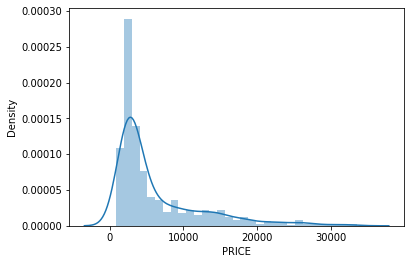

In [18]:
sns.distplot(df["PRICE"])

In [19]:
df.head()

,index,Screen_Size,Screen_Tech,Screen_Body_Ratio,CPU_Model,CPU_Freq,GPU_Model,RAM,Operating_System,CPU_Tickness,Camera_Resolution,Selfie_Camera_Resolution,Width,Height,Tickness,Weight,Charge_Type,Battery_Size,Storage_Capacity,Release_Year,PRICE
0,0,6.43 inç,AMOLED,84.4 %,Qualcomm SM6115 Snapdragon 662,2.0 GHz,Adreno 610,4 GB RAM,Android 11,11 nm,48 MP,16 MP,73.8 mm,6.43 inç,8 mm,175 gr,USB Type-C,5000 mAh,128 GB,2021,3165
1,1,6.1 inç,IPS LCD,79 %,Apple A13 Bionic,2.66 GHz,Apple GPU,4 GB RAM,iOS 13,7 nm,12 MP,12 MP,75.7 mm,6.1 inç,8.3 mm,194 gr,Lightning,1821 mAh,128 GB,2019,10919
2,2,6.43 inç,AMOLED,83.5 %,Mediatek Helio G95,2.05 GHz,Mali-G76 MC4,6 GB RAM,Android 11,12 nm,64 MP,13 MP,74.5 mm,6.43 inç,8.3 mm,178.8 gr,USB Type-C,5000 mAh,128 GB,2021,3789
3,3,6.5 inç,Super AMOLED,86.1 %,Exynos 9611,2.3 GHz,Mali-G72 MP3,6 GB RAM,Android 10.0,10 nm,64 MP,32 MP,74.4 mm,6.5 inç,9.3 mm,203 gr,USB Type-C,6000 mAh,128 GB,2020,3599
4,4,6.43 inç,AMOLED,85.2 %,Mediatek MT6779V Helio P95,2.2 GHz,PowerVR GM9446,8 GB RAM,Android 11,12 nm,48 MP,32 MP,73.2 mm,6.43 inç,7.8 mm,172 gr,USB Type-C,4310 mAh,128 GB,2021,4206


In [20]:
df["Screen_Tech"].replace({"Missing":"IPS LCD"}, inplace=True)
df["Screen_Body_Ratio"].replace({"Missing":"0.0 %"}, inplace=True) 
df["Release_Year"].replace({"Missing":"2019"}, inplace=True)   
df["Charge_Type"].replace({"Missing":"USB Type-C"}, inplace=True)
df["Width"].replace({"Missing":"0.0 mm"}, inplace=True)
df["Tickness"].replace({"Missing":"0.0 mm"}, inplace=True)
df["Weight"].replace({"Missing":"0.0 gr"}, inplace=True) 
df["Selfie_Camera_Resolution"].replace({"Missing":"8 Mp"}, inplace=True)
df["RAM"].replace({"Missing":"4 GB RAM"}, inplace=True)
df["Storage_Capacity"].replace({"1 TB":"1024 GB"}, inplace=True)
df["Battery_Size"].replace({"Missing":"0 mAh"}, inplace=True)

In [21]:
df = df[(df["CPU_Model"] !="Missing")]

In [22]:
df = df.drop("Height",1)

C:\Users\Ugur\AppData\Local\Temp/ipykernel_10872/1299255188.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("Height",1)


In [23]:
df = df.reset_index() 

In [24]:
for i in range(df.shape[0]) :
    df.loc[i,'Screen_Size'] = df.loc[i,'Screen_Size'].split(" ")[0]

In [25]:
df = df.astype({"Screen_Size": float})

In [26]:
for i in range(df.shape[0]) :
    
    if " " in df.loc[i,'Screen_Body_Ratio'] :
        df.loc[i,'Screen_Body_Ratio'] = df.loc[i,'Screen_Body_Ratio'].split(" ")[0] 
        
    else :
        df.loc[i,'Screen_Body_Ratio'] = df.loc[i,'Screen_Body_Ratio'].split("%")[0]

In [27]:
df = df.astype({"Screen_Body_Ratio": float})

In [28]:
df["Screen_Body_Ratio"].replace({0.0 : round(df["Screen_Body_Ratio"].mean() , 1)}, inplace=True)

In [29]:
for i in range(df.shape[0]) :
    df.loc[i,'CPU_Freq'] = df.loc[i,'CPU_Freq'].split(" ")[0]

In [30]:
df = df.astype({"CPU_Freq": float})

In [31]:
for i in range(df.shape[0]) :
    df.loc[i,'RAM'] = df.loc[i,'RAM'].split(" ")[0]

In [32]:
df = df.astype({"RAM": int})

In [33]:
for i in range(df.shape[0]) :
    df.loc[i,'CPU_Tickness'] = df.loc[i,'CPU_Tickness'].split(" ")[0]

In [34]:
df = df.astype({"CPU_Tickness": int})

In [35]:
for i in range(df.shape[0]) :
    df.loc[i,'Camera_Resolution'] = df.loc[i,'Camera_Resolution'].split(" ")[0]

In [36]:
df = df.astype({"Camera_Resolution": int}) 

In [37]:
for i in range(df.shape[0]) :
    df.loc[i,'Selfie_Camera_Resolution'] = df.loc[i,'Selfie_Camera_Resolution'].split(" ")[0]

In [38]:
df = df.astype({"Selfie_Camera_Resolution": float}) 

In [39]:
for i in range(df.shape[0]) :
    df.loc[i,'Width'] = df.loc[i,'Width'].split(" ")[0]

In [40]:
df = df.astype({"Width": float}) 

In [41]:
df["Width"].replace({0.0 : round(df["Width"].mean() , 1)}, inplace=True)

In [42]:
for i in range(df.shape[0]) :
    df.loc[i,'Tickness'] = df.loc[i,'Tickness'].split(" ")[0]

In [43]:
df = df.astype({"Tickness": float}) 

In [44]:
df["Tickness"].replace({0.0 : round(df["Tickness"].mean() , 1)}, inplace=True)

In [45]:
for i in range(df.shape[0]) :
    df.loc[i,'Weight'] = df.loc[i,'Weight'].split(" ")[0]

In [46]:
df = df.astype({"Weight": float}) 

In [47]:
df["Weight"].replace({0.0 : round(df["Weight"].mean() , 1)}, inplace=True)

In [48]:
for i in range(df.shape[0]) :
    df.loc[i,'Battery_Size'] = df.loc[i,'Battery_Size'].split(" ")[0]

In [49]:
df = df.astype({"Battery_Size": int}) 

In [50]:
df["Battery_Size"].replace({0 : round(df["Battery_Size"].mean() , 1)}, inplace=True)

In [51]:
for i in range(df.shape[0]) :
    df.loc[i,'Storage_Capacity'] = df.loc[i,'Storage_Capacity'].split(" ")[0]

In [52]:
df = df.astype({"Storage_Capacity": int}) 

In [53]:
for i in range(df.shape[0]) :
    df.loc[i,'Release_Year'] = df.loc[i,'Release_Year'].split(" ")[0]

In [54]:
df = df.astype({"Release_Year": int}) 

In [55]:
df.head()

,level_0,index,Screen_Size,Screen_Tech,Screen_Body_Ratio,CPU_Model,CPU_Freq,GPU_Model,RAM,Operating_System,CPU_Tickness,Camera_Resolution,Selfie_Camera_Resolution,Width,Tickness,Weight,Charge_Type,Battery_Size,Storage_Capacity,Release_Year,PRICE
0,0,0,6.43,AMOLED,84.4,Qualcomm SM6115 Snapdragon 662,2.00,Adreno 610,4,Android 11,11,48,16.0,73.8,8.0,175.0,USB Type-C,5000.0,128,2021,3165
1,1,1,6.10,IPS LCD,79.0,Apple A13 Bionic,2.66,Apple GPU,4,iOS 13,7,12,12.0,75.7,8.3,194.0,Lightning,1821.0,128,2019,10919
2,2,2,6.43,AMOLED,83.5,Mediatek Helio G95,2.05,Mali-G76 MC4,6,Android 11,12,64,13.0,74.5,8.3,178.8,USB Type-C,5000.0,128,2021,3789
3,3,3,6.50,Super AMOLED,86.1,Exynos 9611,2.30,Mali-G72 MP3,6,Android 10.0,10,64,32.0,74.4,9.3,203.0,USB Type-C,6000.0,128,2020,3599
4,4,4,6.43,AMOLED,85.2,Mediatek MT6779V Helio P95,2.20,PowerVR GM9446,8,Android 11,12,48,32.0,73.2,7.8,172.0,USB Type-C,4310.0,128,2021,4206


## EXPLORATORY DATA ANALYSIS

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   level_0                   1282 non-null   int64  
 1   index                     1282 non-null   int64  
 2   Screen_Size               1282 non-null   float64
 3   Screen_Tech               1282 non-null   object 
 4   Screen_Body_Ratio         1282 non-null   float64
 5   CPU_Model                 1282 non-null   object 
 6   CPU_Freq                  1282 non-null   float64
 7   GPU_Model                 1282 non-null   object 
 8   RAM                       1282 non-null   int32  
 9   Operating_System          1282 non-null   object 
 10  CPU_Tickness              1282 non-null   int32  
 11  Camera_Resolution         1282 non-null   int32  
 12  Selfie_Camera_Resolution  1282 non-null   float64
 13  Width                     1282 non-null   float64
 14  Tickness

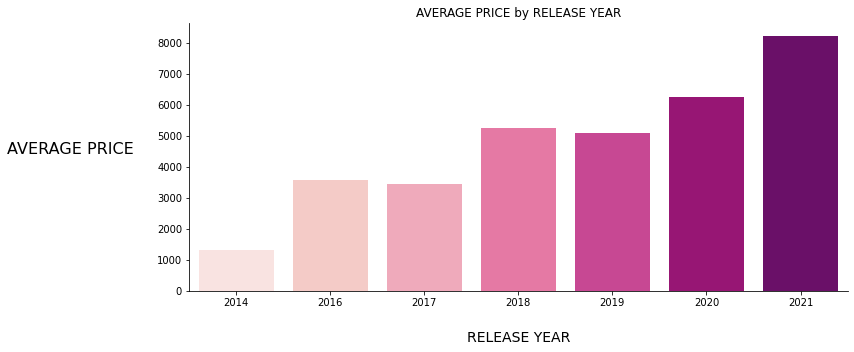

In [57]:
df1 = df.groupby("Release_Year")[["PRICE"]].agg({'PRICE': 'mean'}).sort_values("PRICE" , ascending = False)

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=df1.index , y= 'PRICE' ,data=df1 , ax=ax , palette="RdPu" )
ax.set_title('AVERAGE PRICE by RELEASE YEAR')
ax.set_ylabel('AVERAGE PRICE' ,rotation = 0 , fontsize=16)
ax.set_xlabel('RELEASE YEAR',fontsize=14)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig('name.png', dpi=200, transparent=True)

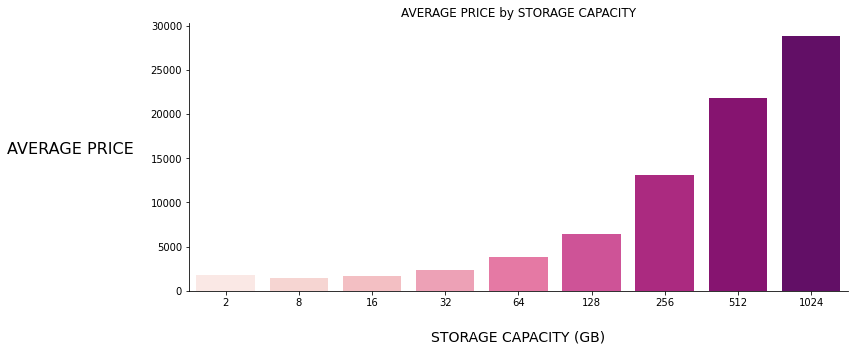

In [58]:
df2 = df.groupby("Storage_Capacity")[["PRICE"]].agg({'PRICE': 'mean'}).sort_values("PRICE" , ascending = False)

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=df2.index , y= 'PRICE' ,data=df2 , ax=ax , palette="RdPu" )
ax.set_title('AVERAGE PRICE by STORAGE CAPACITY')
ax.set_ylabel('AVERAGE PRICE' ,rotation = 0 , fontsize=16)
ax.set_xlabel('STORAGE CAPACITY (GB)',fontsize=14)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig('name1.png', dpi=200, transparent=True)

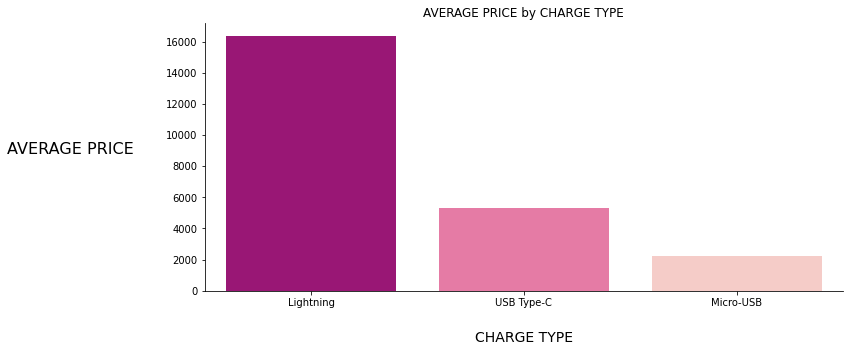

In [59]:
df3 = df.groupby("Charge_Type")[["PRICE"]].agg({'PRICE': 'mean'}).sort_values("PRICE" , ascending = False)

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=df3.index , y= 'PRICE' ,data=df3 , ax=ax , palette="RdPu_r" )
ax.set_title('AVERAGE PRICE by CHARGE TYPE')
ax.set_ylabel('AVERAGE PRICE' ,rotation = 0 , fontsize=16)
ax.set_xlabel('CHARGE TYPE',fontsize=14)
ax.yaxis.set_label_coords(-0.21,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig('name2.png', dpi=200, transparent=True)

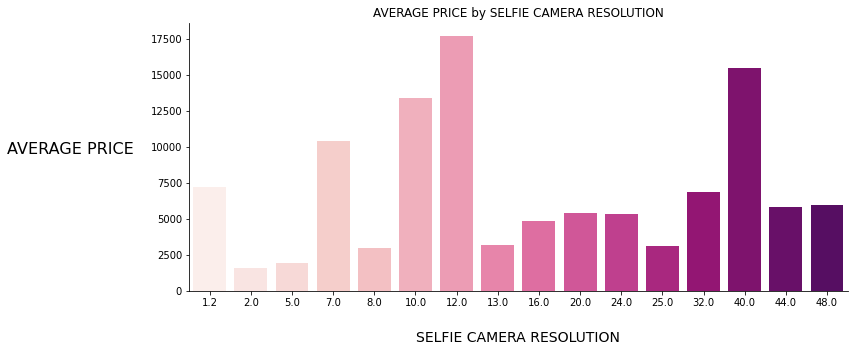

In [60]:
df4 = df.groupby("Selfie_Camera_Resolution")[["PRICE"]].agg({'PRICE': 'mean'}).sort_values("PRICE" , ascending = False)

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=df4.index , y= 'PRICE' ,data=df4 , ax=ax , palette="RdPu" )
ax.set_title('AVERAGE PRICE by SELFIE CAMERA RESOLUTION')
ax.set_ylabel('AVERAGE PRICE' ,rotation = 0 , fontsize=16)
ax.set_xlabel('SELFIE CAMERA RESOLUTION',fontsize=14)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig('name3.png', dpi=200, transparent=True)

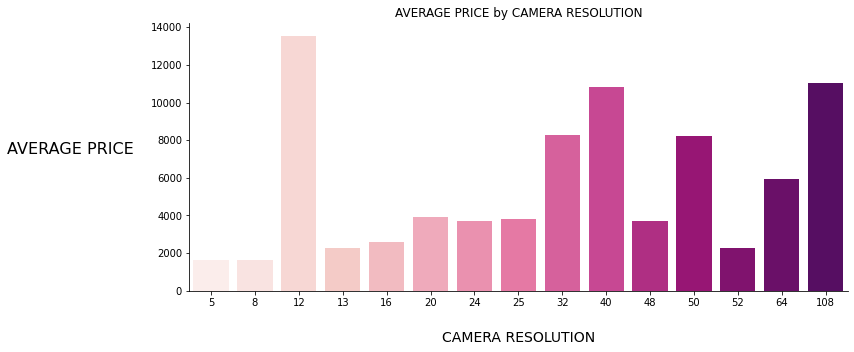

In [61]:
df5 = df.groupby("Camera_Resolution")[["PRICE"]].agg({'PRICE': 'mean'}).sort_values("PRICE" , ascending = False)

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=df5.index , y= 'PRICE' ,data=df5 , ax=ax , palette="RdPu" )
ax.set_title('AVERAGE PRICE by CAMERA RESOLUTION')
ax.set_ylabel('AVERAGE PRICE' ,rotation = 0 , fontsize=16)
ax.set_xlabel('CAMERA RESOLUTION',fontsize=14)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig('name4.png', dpi=200, transparent=True)

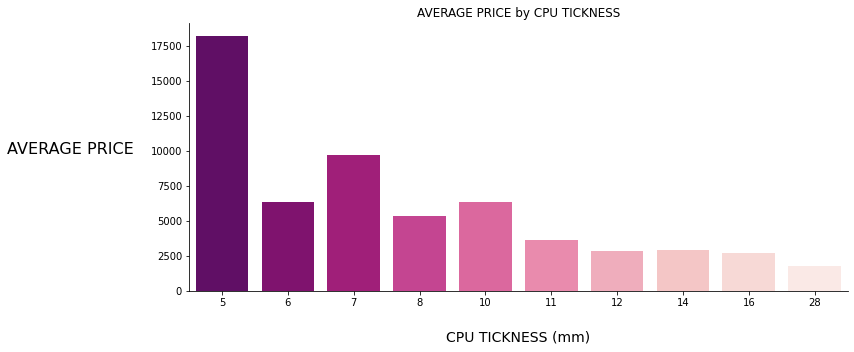

In [62]:
df6 = df.groupby("CPU_Tickness")[["PRICE"]].agg({'PRICE': 'mean'}).sort_values("PRICE" , ascending = False)

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=df6.index , y= 'PRICE' ,data=df6 , ax=ax , palette="RdPu_r" )
ax.set_title('AVERAGE PRICE by CPU TICKNESS')
ax.set_ylabel('AVERAGE PRICE' ,rotation = 0 , fontsize=16)
ax.set_xlabel('CPU TICKNESS (mm)',fontsize=14)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig('name5.png', dpi=200, transparent=True)

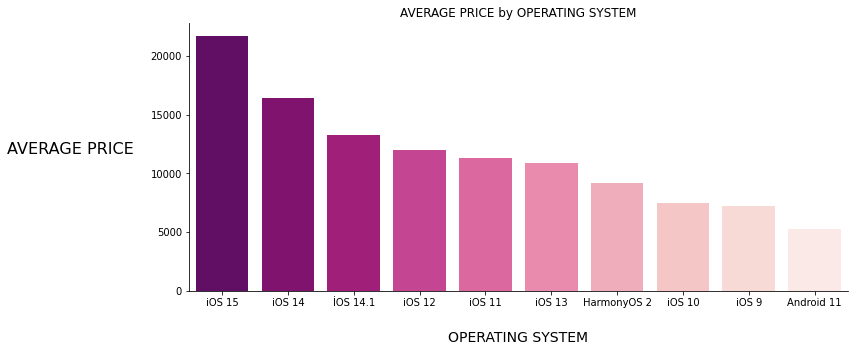

In [63]:
df7 = df.groupby("Operating_System")[["PRICE"]].agg({'PRICE': 'mean'}).sort_values("PRICE" , ascending = False).head(10)

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=df7.index , y= 'PRICE' ,data=df7 , ax=ax , palette="RdPu_r" )
ax.set_title('AVERAGE PRICE by OPERATING SYSTEM')
ax.set_ylabel('AVERAGE PRICE' ,rotation = 0 , fontsize=16)
ax.set_xlabel('OPERATING SYSTEM',fontsize=14)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig('name6.png', dpi=200, transparent=True)

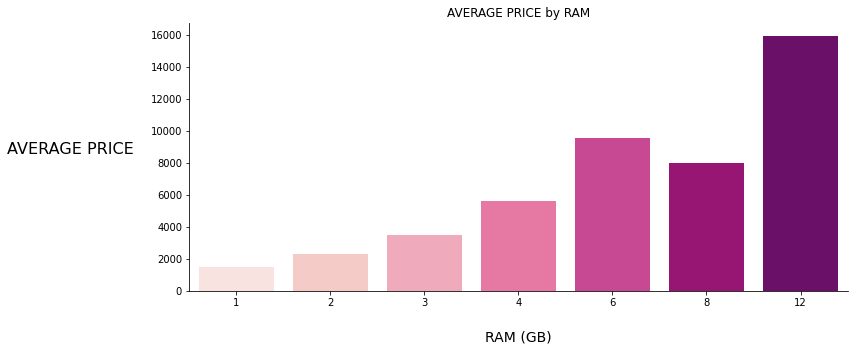

In [64]:
df8 = df.groupby("RAM")[["PRICE"]].agg({'PRICE': 'mean'}).sort_values("PRICE" , ascending = False)

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=df8.index , y= 'PRICE' ,data=df8 , ax=ax , palette="RdPu" )
ax.set_title('AVERAGE PRICE by RAM')
ax.set_ylabel('AVERAGE PRICE' ,rotation = 0 , fontsize=16)
ax.set_xlabel('RAM (GB)',fontsize=14)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig('name7.png', dpi=200, transparent=True)

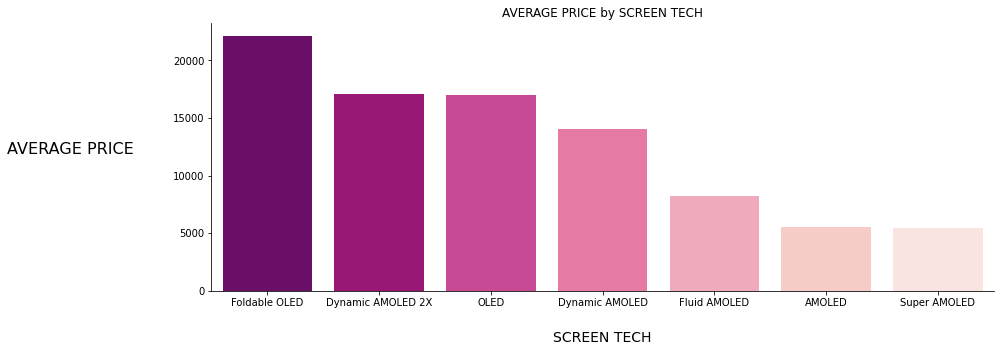

In [65]:
df9 = df.groupby("Screen_Tech")[["PRICE"]].agg({'PRICE': 'mean'}).sort_values("PRICE" , ascending = False).head(7)

fig, ax = plt.subplots(figsize=(14,5))
sns.barplot(x=df9.index , y= 'PRICE' ,data=df9 , ax=ax , palette="RdPu_r" )
ax.set_title('AVERAGE PRICE by SCREEN TECH')
ax.set_ylabel('AVERAGE PRICE' ,rotation = 0 , fontsize=16)
ax.set_xlabel('SCREEN TECH',fontsize=14)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig('name8.png', dpi=200, transparent=True)

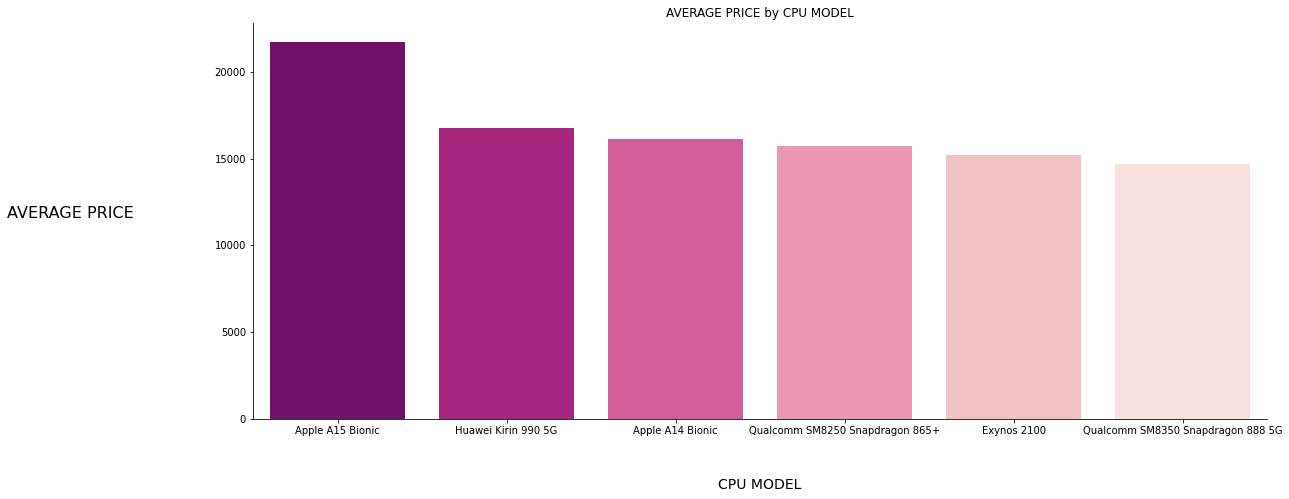

In [66]:
df10 = df.groupby("CPU_Model")[["PRICE"]].agg({'PRICE': 'mean'}).sort_values("PRICE" , ascending = False).head(6)

fig, ax = plt.subplots(figsize=(18,7))
sns.barplot(x=df10.index , y= 'PRICE' ,data=df10 , ax=ax , palette="RdPu_r" )
ax.set_title('AVERAGE PRICE by CPU MODEL')
ax.set_ylabel('AVERAGE PRICE' ,rotation = 0 , fontsize=16)
ax.set_xlabel('CPU MODEL',fontsize=14)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig('name9.png', dpi=200, transparent=True)

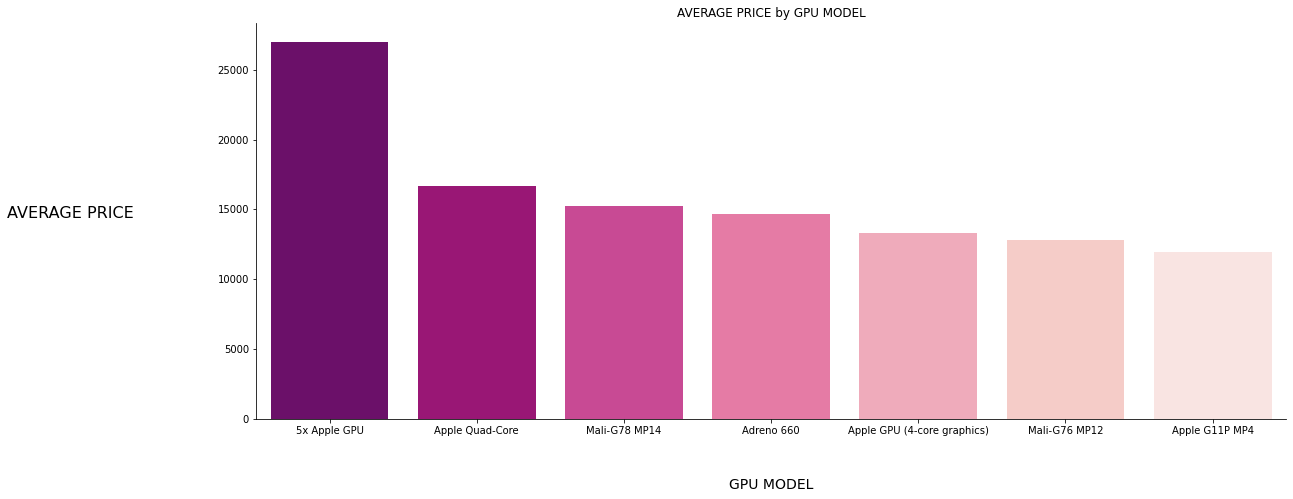

In [67]:
df11 = df.groupby("GPU_Model")[["PRICE"]].agg({'PRICE': 'mean'}).sort_values("PRICE" , ascending = False).head(7)

fig, ax = plt.subplots(figsize=(18,7))
sns.barplot(x=df11.index , y= 'PRICE' ,data=df11 , ax=ax , palette="RdPu_r" )
ax.set_title('AVERAGE PRICE by GPU MODEL')
ax.set_ylabel('AVERAGE PRICE' ,rotation = 0 , fontsize=16)
ax.set_xlabel('GPU MODEL',fontsize=14)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig('name10.png', dpi=200, transparent=True)

### ONE-HOT ENCODING AND CORRELATION HEATMAP

In [68]:
df1 = df[['Screen_Size', 'Screen_Body_Ratio', 'CPU_Freq', 'RAM','CPU_Tickness', 'Camera_Resolution', 'Selfie_Camera_Resolution','Width', 'Tickness', 'Weight', 'Battery_Size',
       'Storage_Capacity', 'Release_Year','PRICE']]
df1 = pd.concat([df1,pd.get_dummies(df[['Screen_Tech','CPU_Model','GPU_Model','Operating_System','Charge_Type']])], axis=1)

df1.head()

,Screen_Size,Screen_Body_Ratio,CPU_Freq,RAM,CPU_Tickness,Camera_Resolution,Selfie_Camera_Resolution,Width,Tickness,Weight,Battery_Size,Storage_Capacity,Release_Year,PRICE,Screen_Tech_AMOLED,Screen_Tech_Dynamic AMOLED,Screen_Tech_Dynamic AMOLED 2X,Screen_Tech_Fluid AMOLED,Screen_Tech_Foldable OLED,Screen_Tech_IPS LCD,Screen_Tech_OLED,Screen_Tech_PLS,Screen_Tech_PLS IPS,Screen_Tech_PLS TFT,Screen_Tech_Super AMOLED,Screen_Tech_TFT LCD,CPU_Model_Apple A10 Fusion,CPU_Model_Apple A11 Bionic,CPU_Model_Apple A12 Bionic,CPU_Model_Apple A13 Bionic,CPU_Model_Apple A14 Bionic,CPU_Model_Apple A15 Bionic,CPU_Model_Apple A9,CPU_Model_Exynos 2100,CPU_Model_Exynos 7884,CPU_Model_Exynos 850,CPU_Model_Exynos 9611,CPU_Model_Exynos 9810,CPU_Model_Exynos 990,CPU_Model_HiSilicon Kirin 659,CPU_Model_HiSilicon Kirin 710,CPU_Model_HiSilicon Kirin 810,CPU_Model_HiSilicon Kirin 970,CPU_Model_HiSilicon Kirin 980,CPU_Model_HiSilicon Kirin 990,CPU_Model_Hisilicon Kirin 710F,CPU_Model_Huawei Kirin 710,CPU_Model_Huawei Kirin 710F,CPU_Model_Huawei Kirin 990 5G,CPU_Model_Kirin 710A,...,GPU_Model_Mali-G76 3EEMC4,GPU_Model_Mali-G76 MC4,GPU_Model_Mali-G76 MP10,GPU_Model_Mali-G76 MP12,GPU_Model_Mali-G76 MP16,GPU_Model_Mali-G77 MC9,GPU_Model_Mali-G77 MP11,GPU_Model_Mali-G78 MP14,GPU_Model_Mali-T720 MP1,GPU_Model_Mali-T720 MP3,GPU_Model_Mali-T820 MP1,GPU_Model_Mali-T830 MP1,GPU_Model_Mali-T830 MP2,GPU_Model_Mali-T860 MP2,GPU_Model_Mali-T880 MP2,GPU_Model_Mali-T880MP2,GPU_Model_PowerVR 7600T Plus (MP6),GPU_Model_PowerVR GE8100,GPU_Model_PowerVR GE8320,GPU_Model_PowerVR GE8322,GPU_Model_PowerVR GM9446,GPU_Model_PowerVR GT7600,Operating_System_Android 10 (Go edition),Operating_System_Android 10 (Q),Operating_System_Android 10.0,Operating_System_Android 11,Operating_System_Android 4.4.2 (KitKat),Operating_System_Android 5.1 (Lollipop),Operating_System_Android 6.0 (Marshmallow),Operating_System_Android 6.0.1 (Marshmallow),Operating_System_Android 7.0 (Nougat),Operating_System_Android 7.1.1 (Nougat),Operating_System_Android 7.1.2 (Nougat),Operating_System_Android 8.0 (Oreo),Operating_System_Android 8.1 (Oreo GO Edition),Operating_System_Android 8.1 (Oreo),Operating_System_Android 9.0 (Pie),Operating_System_Android 9.0 Pie (Go Edition),Operating_System_HarmonyOS 2,Operating_System_iOS 10,Operating_System_iOS 11,Operating_System_iOS 12,Operating_System_iOS 13,Operating_System_iOS 14,Operating_System_iOS 15,Operating_System_iOS 9,Operating_System_İOS 14.1,Charge_Type_Lightning,Charge_Type_Micro-USB,Charge_Type_USB Type-C
0,6.43,84.4,2.00,4,11,48,16.0,73.8,8.0,175.0,5000.0,128,2021,3165,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6.10,79.0,2.66,4,7,12,12.0,75.7,8.3,194.0,1821.0,128,2019,10919,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,6.43,83.5,2.05,6,12,64,13.0,74.5,8.3,178.8,5000.0,128,2021,3789,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6.50,86.1,2.30,6,10,64,32.0,74.4,9.3,203.0,6000.0,128,2020,3599,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6.43,85.2,2.20,8,12,48,32.0,73.2,7.8,172.0,4310.0,128,2021,4206,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [69]:
df1 = df1.sort_values(by=['Release_Year'], ascending=False)

In [70]:
df1.head()

,Screen_Size,Screen_Body_Ratio,CPU_Freq,RAM,CPU_Tickness,Camera_Resolution,Selfie_Camera_Resolution,Width,Tickness,Weight,Battery_Size,Storage_Capacity,Release_Year,PRICE,Screen_Tech_AMOLED,Screen_Tech_Dynamic AMOLED,Screen_Tech_Dynamic AMOLED 2X,Screen_Tech_Fluid AMOLED,Screen_Tech_Foldable OLED,Screen_Tech_IPS LCD,Screen_Tech_OLED,Screen_Tech_PLS,Screen_Tech_PLS IPS,Screen_Tech_PLS TFT,Screen_Tech_Super AMOLED,Screen_Tech_TFT LCD,CPU_Model_Apple A10 Fusion,CPU_Model_Apple A11 Bionic,CPU_Model_Apple A12 Bionic,CPU_Model_Apple A13 Bionic,CPU_Model_Apple A14 Bionic,CPU_Model_Apple A15 Bionic,CPU_Model_Apple A9,CPU_Model_Exynos 2100,CPU_Model_Exynos 7884,CPU_Model_Exynos 850,CPU_Model_Exynos 9611,CPU_Model_Exynos 9810,CPU_Model_Exynos 990,CPU_Model_HiSilicon Kirin 659,CPU_Model_HiSilicon Kirin 710,CPU_Model_HiSilicon Kirin 810,CPU_Model_HiSilicon Kirin 970,CPU_Model_HiSilicon Kirin 980,CPU_Model_HiSilicon Kirin 990,CPU_Model_Hisilicon Kirin 710F,CPU_Model_Huawei Kirin 710,CPU_Model_Huawei Kirin 710F,CPU_Model_Huawei Kirin 990 5G,CPU_Model_Kirin 710A,...,GPU_Model_Mali-G76 3EEMC4,GPU_Model_Mali-G76 MC4,GPU_Model_Mali-G76 MP10,GPU_Model_Mali-G76 MP12,GPU_Model_Mali-G76 MP16,GPU_Model_Mali-G77 MC9,GPU_Model_Mali-G77 MP11,GPU_Model_Mali-G78 MP14,GPU_Model_Mali-T720 MP1,GPU_Model_Mali-T720 MP3,GPU_Model_Mali-T820 MP1,GPU_Model_Mali-T830 MP1,GPU_Model_Mali-T830 MP2,GPU_Model_Mali-T860 MP2,GPU_Model_Mali-T880 MP2,GPU_Model_Mali-T880MP2,GPU_Model_PowerVR 7600T Plus (MP6),GPU_Model_PowerVR GE8100,GPU_Model_PowerVR GE8320,GPU_Model_PowerVR GE8322,GPU_Model_PowerVR GM9446,GPU_Model_PowerVR GT7600,Operating_System_Android 10 (Go edition),Operating_System_Android 10 (Q),Operating_System_Android 10.0,Operating_System_Android 11,Operating_System_Android 4.4.2 (KitKat),Operating_System_Android 5.1 (Lollipop),Operating_System_Android 6.0 (Marshmallow),Operating_System_Android 6.0.1 (Marshmallow),Operating_System_Android 7.0 (Nougat),Operating_System_Android 7.1.1 (Nougat),Operating_System_Android 7.1.2 (Nougat),Operating_System_Android 8.0 (Oreo),Operating_System_Android 8.1 (Oreo GO Edition),Operating_System_Android 8.1 (Oreo),Operating_System_Android 9.0 (Pie),Operating_System_Android 9.0 Pie (Go Edition),Operating_System_HarmonyOS 2,Operating_System_iOS 10,Operating_System_iOS 11,Operating_System_iOS 12,Operating_System_iOS 13,Operating_System_iOS 14,Operating_System_iOS 15,Operating_System_iOS 9,Operating_System_İOS 14.1,Charge_Type_Lightning,Charge_Type_Micro-USB,Charge_Type_USB Type-C
0,6.43,84.4,2.00,4,11,48,16.0,73.8,8.0,175.0,5000.0,128,2021,3165,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
529,6.70,84.7,2.84,8,5,12,10.0,72.2,6.9,183.0,3300.0,128,2021,12999,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
526,6.67,85.6,2.30,6,8,108,16.0,76.5,8.1,193.0,5020.0,128,2021,5600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
521,6.40,83.9,2.00,6,12,64,20.0,74.0,8.4,180.0,5000.0,128,2021,3448,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
519,6.70,91.3,2.05,8,12,50,8.0,73.8,8.7,201.0,4700.0,256,2021,6999,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


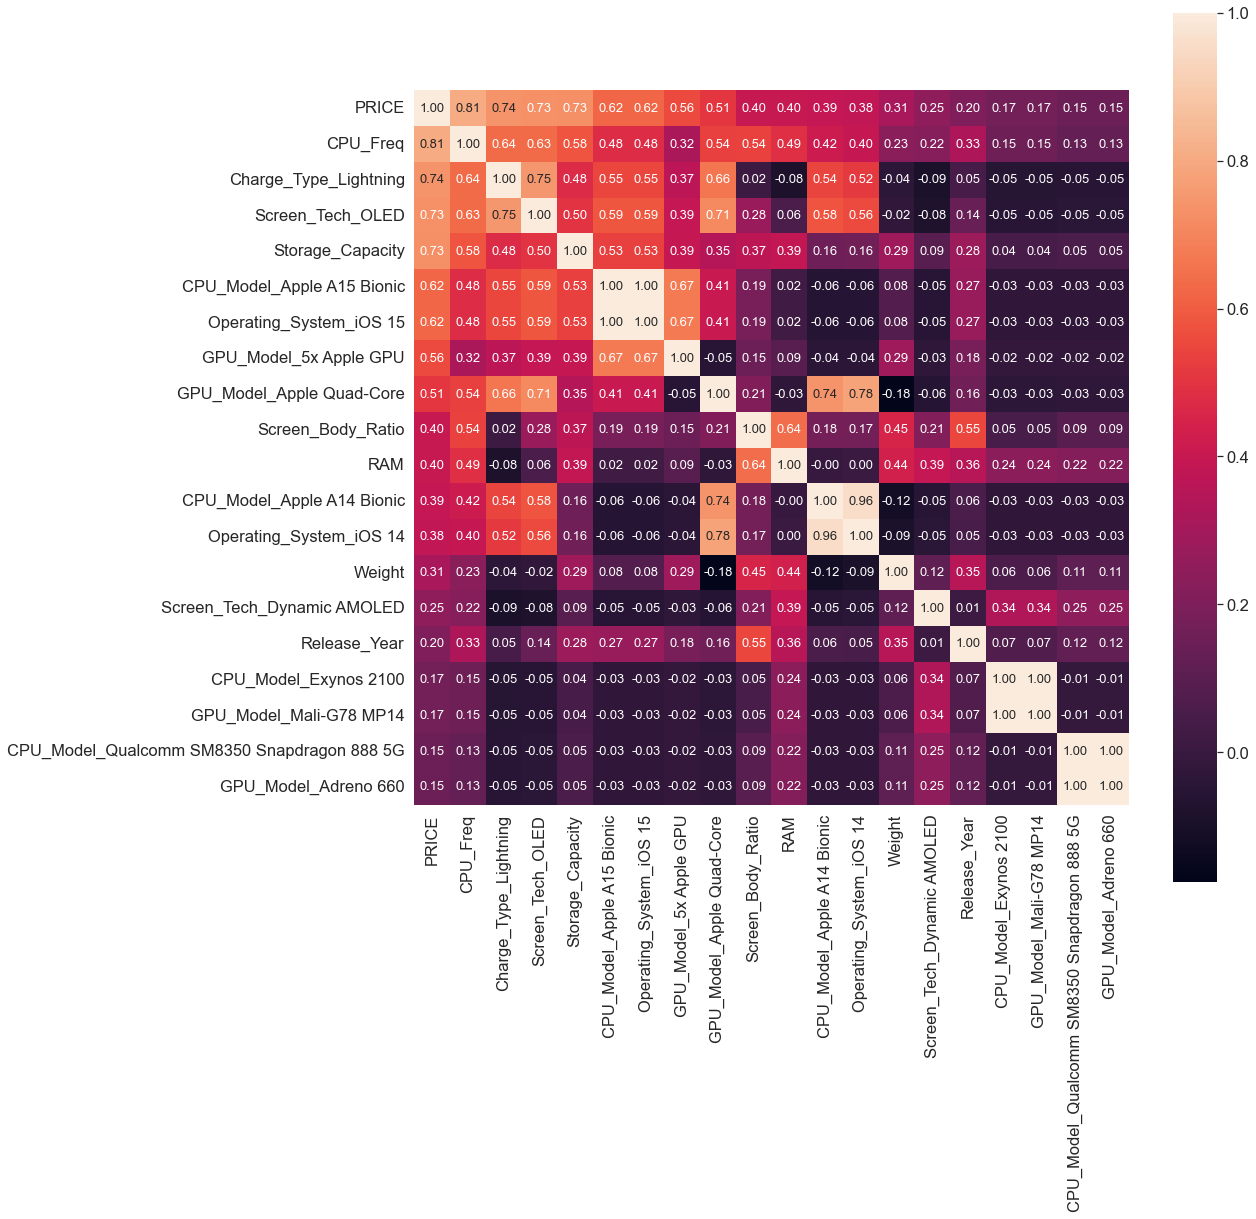

In [71]:
k = 20 #number of variables for heatmap
corrmat = df1.corr()
cols = corrmat.nlargest(k, 'PRICE')['PRICE'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(16,16))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

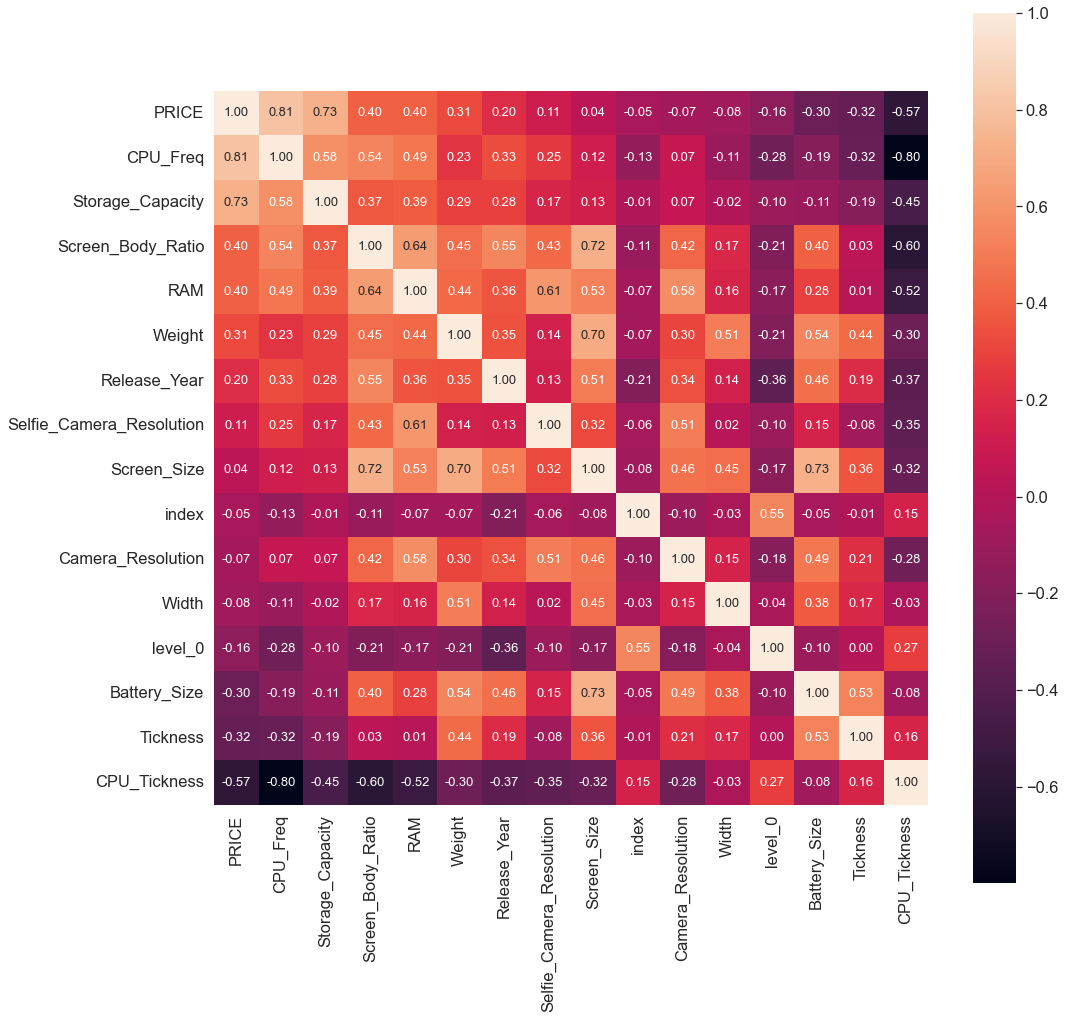

<Figure size 432x288 with 0 Axes>

In [72]:
k = 20 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'PRICE')['PRICE'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(16,16))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig('name111.png', dpi=200, transparent=True)

# MODEL BUILDING AND EVALUATION

In [73]:
from sklearn.model_selection import train_test_split ,cross_val_score , KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV , ElasticNet
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [74]:
trainData = df1.tail(1025)
testData =  df1.head(257)

In [75]:
trainData.shape

(1025, 270)

In [76]:
trainData["PRICE"].mean()

5890.6819512195125

In [77]:
trainData["Release_Year"].value_counts()

2020    508
2019    248
2018    113
2021     98
2017     48
2016      9
2014      1
Name: Release_Year, dtype: int64

In [78]:
testData["PRICE"].mean()

8232.280155642024

In [79]:
testData["Release_Year"].value_counts()

2021    257
Name: Release_Year, dtype: int64

### LINEAR REGRESSION TRAIN VALIDATION TEST

In [80]:
X = trainData.drop("PRICE",1)
y = trainData.loc[ : , "PRICE"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

C:\Users\Ugur\AppData\Local\Temp/ipykernel_10872/928287237.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = trainData.drop("PRICE",1)


In [81]:
X_test = testData.drop("PRICE",1)
y_test = testData.loc[ : , "PRICE"]

C:\Users\Ugur\AppData\Local\Temp/ipykernel_10872/3690225336.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test = testData.drop("PRICE",1)


In [82]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [83]:
print(f'Linear Regression Val Data R^2: {lr_model.score(X_val, y_val):.3f}')

Linear Regression Val Data R^2: 0.939


In [84]:
y_pred = lr_model.predict(X_val)
print(f'Linear Regression Val Data MSE: {np.mean((y_pred - y_val)**2):.3f}')

Linear Regression Val Data MSE: 2175701.787


In [85]:
print(f'Linear Regression Test Data R^2: {lr_model.score(X_test, y_test):.3f}')

Linear Regression Test Data R^2: 0.923


In [86]:
y_pred = lr_model.predict(X_test)
print(f'Linear Regression Test Data MSE: {np.mean((y_pred - y_test)**2):.3f}')

Linear Regression Test Data MSE: 5461971.794


### LINEAR REGRESSION TRAIN TEST

In [87]:
X1 = trainData.drop("PRICE",1)
y1 = trainData.loc[ : , "PRICE"]
lr_model1 = LinearRegression()
lr_model1.fit(X1, y1)

C:\Users\Ugur\AppData\Local\Temp/ipykernel_10872/3952030818.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X1 = trainData.drop("PRICE",1)


LinearRegression()

In [88]:
print(f'Linear Regression Test Data R^2: {lr_model1.score(X_test, y_test):.3f}')

Linear Regression Test Data R^2: 0.863


In [89]:
y_pred = lr_model1.predict(X_test)
print(f'Linear Regression Test Data MSE: {np.mean((y_pred - y_test)**2):.3f}')

Linear Regression Test Data MSE: 9759771.948


### RIDGE REGRESSION TRAIN VALIDATION TEST

In [90]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [91]:
print(f'Ridge Regression Val Data R^2: {ridge_model.score(X_val, y_val):.3f}')

Ridge Regression Val Data R^2: 0.945


In [92]:
y_pred = ridge_model.predict(X_val)
print(f'Ridge Regression Val Data MSE: {np.mean((y_pred - y_val)**2):.3f}')

Ridge Regression Val Data MSE: 1951583.722


In [93]:
print(f'Ridge Regression Test Data R^2: {ridge_model.score(X_test, y_test):.3f}')

Ridge Regression Test Data R^2: 0.941


In [94]:
y_pred = ridge_model.predict(X_test)
print(f'Ridge Regression Test Data MSE: {np.mean((y_pred - y_test)**2):.3f}')

Ridge Regression Test Data MSE: 4206589.025


### RIDGE REGRESSION TRAIN TEST

In [95]:
ridge_model1 = Ridge()
ridge_model1.fit(X1, y1)

Ridge()

In [96]:
print(f'Ridge Regression Test Data R^2: {ridge_model1.score(X_test, y_test):.3f}')

Ridge Regression Test Data R^2: 0.954


In [97]:
y_pred = ridge_model1.predict(X_test)
print(f'Ridge Regression Test Data MSE: {np.mean((y_pred - y_test)**2):.3f}')

Ridge Regression Test Data MSE: 3261140.162


### LASSO REGRESSION TRAIN VALIDATION TEST

In [98]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [99]:
print(f'Lasso Regression Val Data R^2: {lasso_model.score(X_val, y_val):.3f}')

Lasso Regression Val Data R^2: 0.943


In [100]:
y_pred = lasso_model.predict(X_val)
print(f'Lasso Regression Val Data MSE: {np.mean((y_pred - y_val)**2):.3f}')

Lasso Regression Val Data MSE: 2028671.645


In [101]:
print(f'Lasso Regression Test Data R^2: {lasso_model.score(X_test, y_test):.3f}')

Lasso Regression Test Data R^2: 0.942


In [102]:
y_pred = lasso_model.predict(X_test)
print(f'Lasso Regression Test Data MSE: {np.mean((y_pred - y_test)**2):.3f}')

Lasso Regression Test Data MSE: 4157696.244


### LASSO REGRESSION TRAIN TEST

In [103]:
lasso_model1 = Lasso()
lasso_model1.fit(X1, y1)

Lasso()

In [104]:
print(f'Lasso Regression Test Data R^2: {lasso_model1.score(X_test, y_test):.3f}')

Lasso Regression Test Data R^2: 0.950


In [105]:
y_pred = lasso_model1.predict(X_test)
print(f'Lasso Regression Test Data MSE: {np.mean((y_pred - y_test)**2):.3f}')

Lasso Regression Test Data MSE: 3565501.685


### ELASTICNET REGRESSION TRAIN VALIDATION TEST

In [106]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

ElasticNet()

In [107]:
print(f'ElasticNet Regression Val Data R^2: {elasticnet_model.score(X_val, y_val):.3f}')

ElasticNet Regression Val Data R^2: 0.806


In [108]:
y_pred = elasticnet_model.predict(X_val)
print(f'ElasticNet Regression Val Data MSE: {np.mean((y_pred - y_val)**2):.3f}')

ElasticNet Regression Val Data MSE: 6849600.488


In [109]:
print(f'ElasticNet Regression Test Data R^2: {elasticnet_model.score(X_test, y_test):.3f}')

ElasticNet Regression Test Data R^2: 0.825


In [110]:
y_pred = elasticnet_model.predict(X_test)
print(f'ElasticNet Regression Test Data MSE: {np.mean((y_pred - y_test)**2):.3f}')

ElasticNet Regression Test Data MSE: 12468972.241


### ELASTICNET REGRESSION TRAIN TEST

In [111]:
elasticnet_model1 = ElasticNet()
elasticnet_model1.fit(X1, y1)

ElasticNet()

In [112]:
print(f'ElasticNet Regression Test Data R^2: {elasticnet_model1.score(X_test, y_test):.3f}')

ElasticNet Regression Test Data R^2: 0.849


In [113]:
y_pred = elasticnet_model1.predict(X_test)
print(f'ElasticNet Regression Test Data MSE: {np.mean((y_pred - y_test)**2):.3f}')

ElasticNet Regression Test Data MSE: 10791699.410


## KFold Cross Validation

In [138]:
kf = KFold(n_splits=10, shuffle=True, random_state = 42)

In [139]:
print(np.mean(cross_val_score(lr_model, X, y, cv=kf, scoring='r2')))

0.9175487445593624


In [140]:
print(np.mean(cross_val_score(lr_model, X_test, y_test, cv=kf, scoring='r2')))

0.9620991481014046


In [141]:
print(np.mean(cross_val_score(ridge_model, X, y, cv=kf, scoring='r2')))

0.9504657956614755


In [142]:
print(np.mean(cross_val_score(ridge_model, X_test, y_test, cv=kf, scoring='r2')))

0.9837801974344333


In [143]:
print(np.mean(cross_val_score(lasso_model, X, y, cv=kf, scoring='r2')))

0.9487073303695827


In [144]:
print(np.mean(cross_val_score(lasso_model, X_test, y_test, cv=kf, scoring='r2')))

D:\Program Files\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.916e+07, tolerance: 1.744e+06
  model = cd_fast.enet_coordinate_descent(
D:\Program Files\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.679e+07, tolerance: 1.587e+06
  model = cd_fast.enet_coordinate_descent(
D:\Program Files\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.323e+07, tolerance: 

0.984793548628461


In [145]:
print(np.mean(cross_val_score(elasticnet_model, X, y, cv=kf, scoring='r2')))

0.821781134446345


In [146]:
print(np.mean(cross_val_score(elasticnet_model, X_test, y_test, cv=kf, scoring='r2')))

0.9130767923165217
